# Project 3 - Hotel KPIs and Critical Dimensions Models - Wilfredo Aaron Sosa Ramos

# Connect the Project to Google Drive

In [86]:
#Mount the google drive connection to our dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Phase 1: Extract

# Load our Dataset

In [87]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/AI/Project 3/dataset/hotel_booking_data_cleaned.csv')

# Check out Dataset

In [88]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06/09/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07/09/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07/09/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07/09/2017


# DataFrame metadata

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Select a random row form out Dataset

In [90]:
df.iloc[152]

hotel                             Resort Hotel
is_canceled                                  1
lead_time                                  101
arrival_date_year                         2015
arrival_date_month                        July
arrival_date_week_number                    28
arrival_date_day_of_month                    5
stays_in_weekend_nights                      2
stays_in_week_nights                         5
adults                                       2
children                                   0.0
babies                                       0
meal                                        HB
country                                    PRT
market_segment                       Online TA
distribution_channel                     TA/TO
is_repeated_guest                            0
previous_cancellations                       0
previous_bookings_not_canceled               0
reserved_room_type                           A
assigned_room_type                           A
booking_chang

# Dataset statistical info.

In [91]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Null values

In [92]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [93]:
df.shape

(119390, 32)

# Phase 2: Transform

# Duplicated data

In [94]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [95]:
df_no_duplicated = df.drop_duplicates()
df_no_duplicated.shape

(87396, 32)

# Empty data

Feature Engineering => Remove unnecessary dimensions

In [96]:
df_empty_data_management = df_no_duplicated.drop(["agent","company"], axis=1)
df_empty_data_management.iloc[157]

hotel                             Resort Hotel
is_canceled                                  0
lead_time                                  111
arrival_date_year                         2015
arrival_date_month                        July
arrival_date_week_number                    28
arrival_date_day_of_month                    6
stays_in_weekend_nights                      1
stays_in_week_nights                         3
adults                                       2
children                                   0.0
babies                                       0
meal                                        BB
country                                    PRT
market_segment                       Online TA
distribution_channel                     TA/TO
is_repeated_guest                            0
previous_cancellations                       0
previous_bookings_not_canceled               0
reserved_room_type                           A
assigned_room_type                           C
booking_chang

In [97]:
print(df_empty_data_management.isnull().sum())
print("Actual DF shape: ",df_empty_data_management.shape)

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           452
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

KPIs:


*   Lead Time
*   Cancellation Ratio
*   Required Parking Spaces Utilization vs. Total Special Requests
*   Booking Changes to Waiting Time Ratio
*   Ratio of Adults vs. Children vs. Babies
*   Special Requests per Guest
*   Lead Time vs. Previous Cancellations Ratio
*   Booking Changes per Arrival Date Week Number














Critical Dimensions:


*   Market Segment
*   Distribution Channel



# Feature Engineering (For KPIs)

Cancellation Ratio

In [98]:
df_empty_data_management['cancelation_ratio'] = df_empty_data_management['previous_cancellations'] / (df_empty_data_management['previous_cancellations'] + df_empty_data_management['previous_bookings_not_canceled'])

Required Parking Spaces Utilization vs. Total Special Requests

In [99]:
df_empty_data_management['parking_special_ratio'] = df_empty_data_management['required_car_parking_spaces'] / df_empty_data_management['total_of_special_requests']

Booking Changes to Waiting Time Ratio

In [100]:
df_empty_data_management['booking_changes_waiting_time_ratio'] = df_empty_data_management['booking_changes'] / df_empty_data_management['days_in_waiting_list']

Ratio of Adults vs. Children vs. Babies

In [101]:
df_empty_data_management['adults_ratio'] = df_empty_data_management['adults'] / (df_empty_data_management['adults'] + df_empty_data_management['children'] + df_empty_data_management['babies'])
df_empty_data_management['children_ratio'] = df_empty_data_management['children'] / (df_empty_data_management['adults'] + df_empty_data_management['children'] + df_empty_data_management['babies'])
df_empty_data_management['babies_ratio'] = df_empty_data_management['babies'] / (df_empty_data_management['adults'] + df_empty_data_management['children'] + df_empty_data_management['babies'])

Special Requests per Guest

In [102]:
df_empty_data_management['special_requests_per_guest'] = df_empty_data_management['total_of_special_requests'] / (df_empty_data_management['adults'] + df_empty_data_management['children'] + df_empty_data_management['babies'])

Lead Time vs. Previous Cancellations Ratio

In [103]:
df_empty_data_management['lead_time_previous_cancel_ratio'] = df_empty_data_management['lead_time'] / df_empty_data_management['previous_cancellations']

Booking Changes per Arrival Date Week Number

In [104]:
df_empty_data_management['booking_changes_per_week'] = df_empty_data_management['booking_changes'] / df_empty_data_management['arrival_date_week_number']

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Statistic Graphics for KPIs

# 1. Lead Time

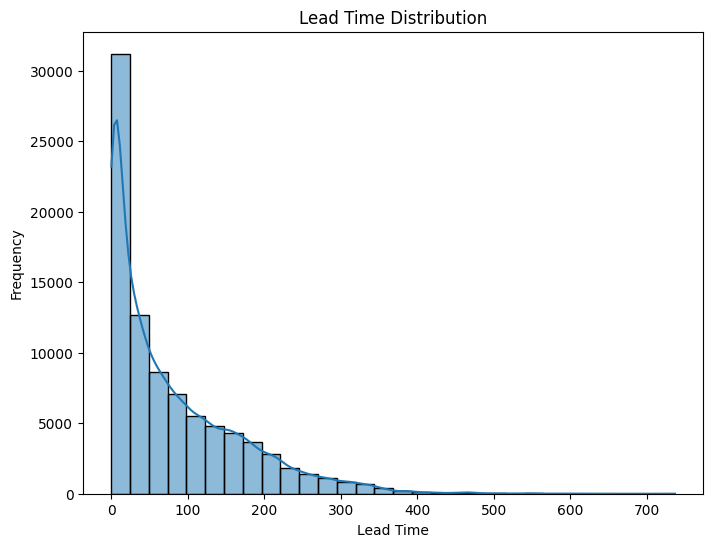

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df_empty_data_management['lead_time'], bins=30, kde=True)
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()

# 2. Cancellation Ratio


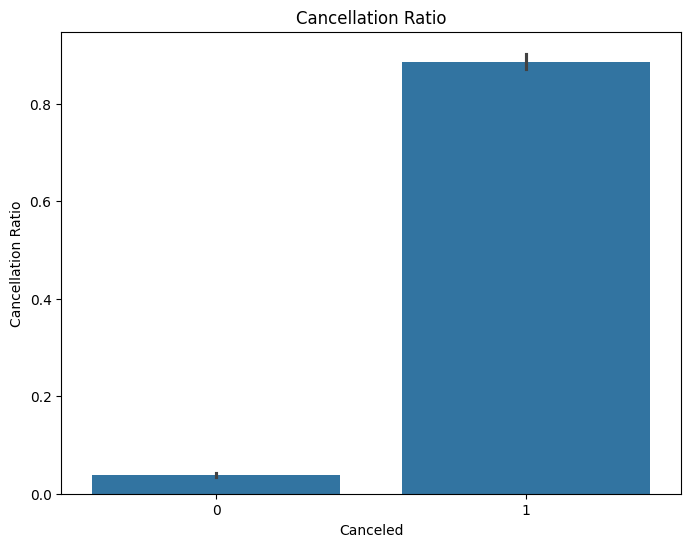

In [107]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df_empty_data_management['is_canceled'], y=df_empty_data_management['cancelation_ratio'])
plt.title('Cancellation Ratio')
plt.xlabel('Canceled')
plt.ylabel('Cancellation Ratio')
plt.show()

# 3. Required Parking Spaces Utilization vs. Total Special Requests

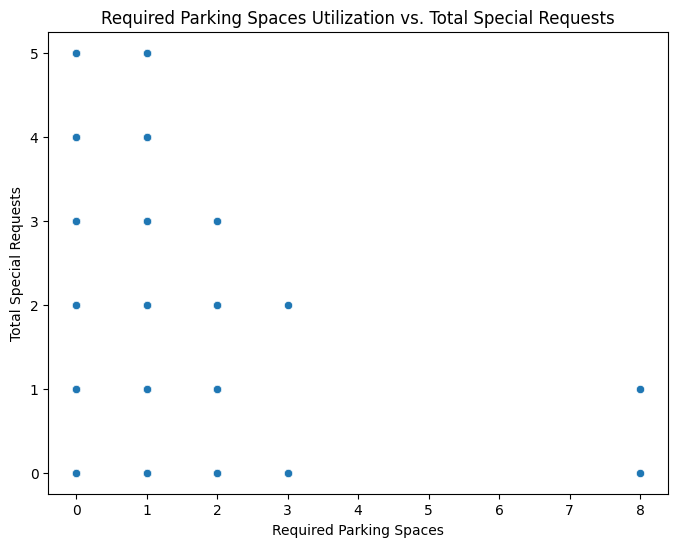

In [108]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_empty_data_management['required_car_parking_spaces'], y=df_empty_data_management['total_of_special_requests'])
plt.title('Required Parking Spaces Utilization vs. Total Special Requests')
plt.xlabel('Required Parking Spaces')
plt.ylabel('Total Special Requests')
plt.show()

# 4. Booking Changes to Waiting Time Ratio

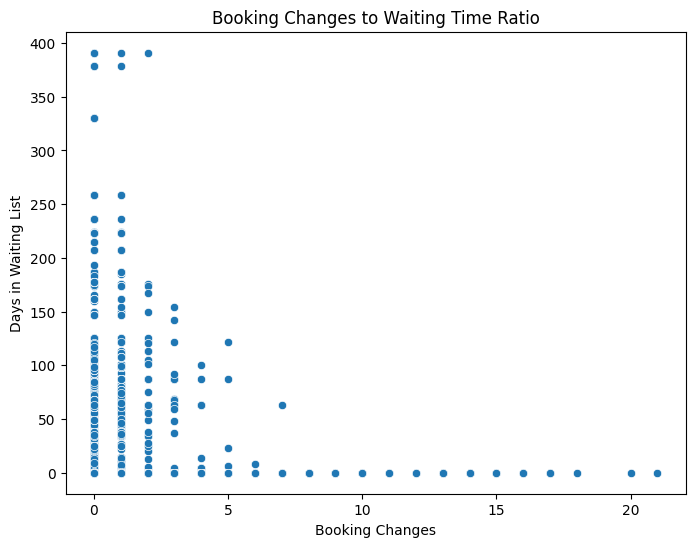

In [109]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_empty_data_management['booking_changes'], y=df_empty_data_management['days_in_waiting_list'])
plt.title('Booking Changes to Waiting Time Ratio')
plt.xlabel('Booking Changes')
plt.ylabel('Days in Waiting List')
plt.show()

# 5. Ratio of Adults vs. Children vs. Babies


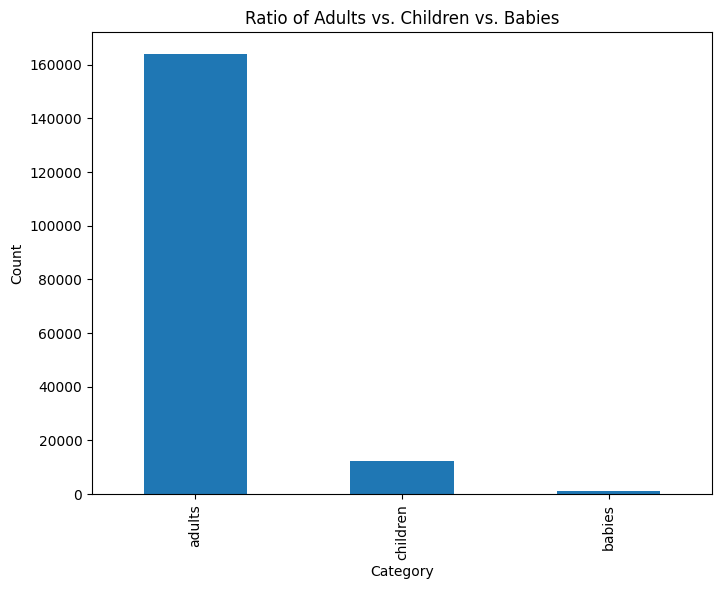

In [110]:
adults_children_babies = df_empty_data_management[['adults', 'children', 'babies']].sum()
plt.figure(figsize=(8, 6))
adults_children_babies.plot(kind='bar', stacked=True)
plt.title('Ratio of Adults vs. Children vs. Babies')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# 6. Special Requests per Guest


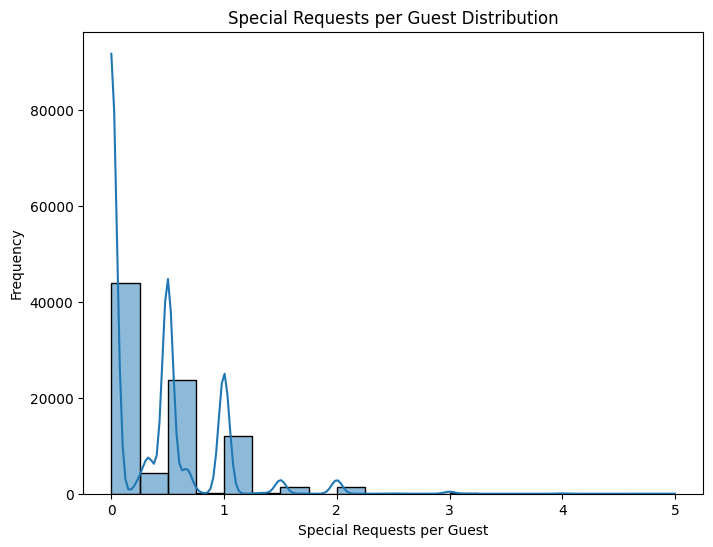

In [111]:
plt.figure(figsize=(8, 6))
sns.histplot(df_empty_data_management['special_requests_per_guest'], bins=20, kde=True)
plt.title('Special Requests per Guest Distribution')
plt.xlabel('Special Requests per Guest')
plt.ylabel('Frequency')
plt.show()

# 7. Lead Time vs. Previous Cancellations Ratio


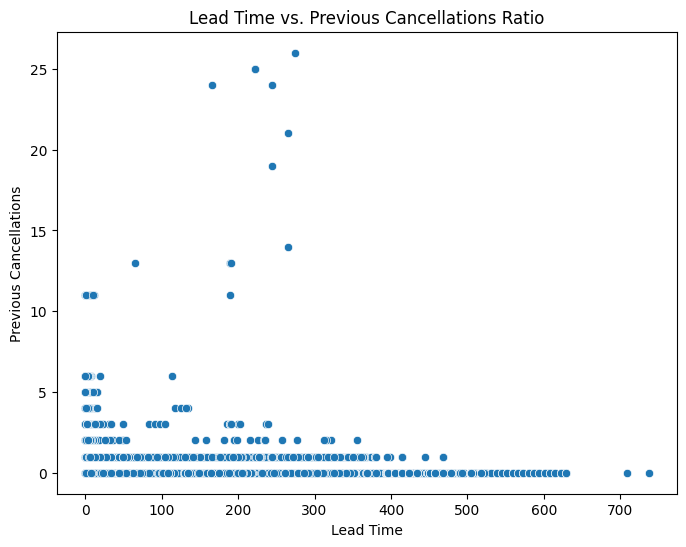

In [112]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_empty_data_management['lead_time'], y=df_empty_data_management['previous_cancellations'])
plt.title('Lead Time vs. Previous Cancellations Ratio')
plt.xlabel('Lead Time')
plt.ylabel('Previous Cancellations')
plt.show()

# 8. Booking Changes per Arrival Date Week Number


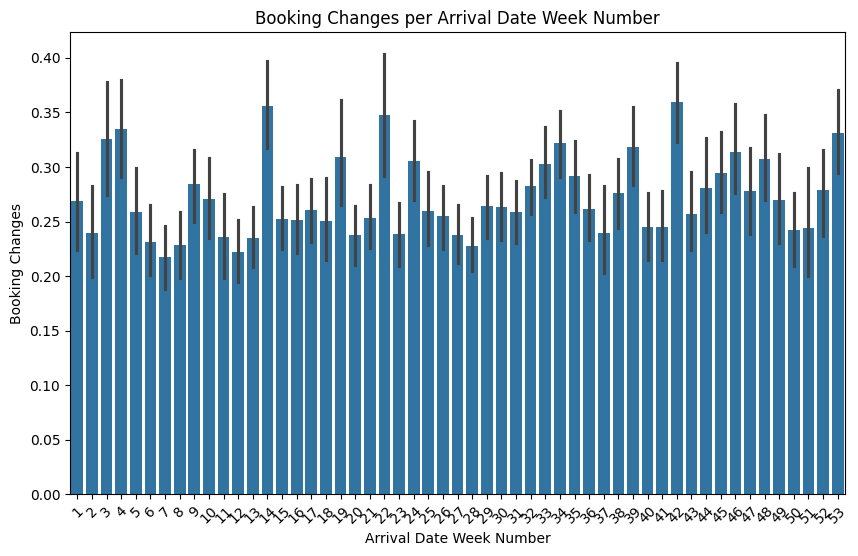

In [113]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_empty_data_management['arrival_date_week_number'], y=df_empty_data_management['booking_changes'])
plt.title('Booking Changes per Arrival Date Week Number')
plt.xlabel('Arrival Date Week Number')
plt.ylabel('Booking Changes')
plt.xticks(rotation=45)
plt.show()

# Removing unnecessary dimensions

In [114]:
df_empty_data_management.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   hotel                               87396 non-null  object 
 1   is_canceled                         87396 non-null  int64  
 2   lead_time                           87396 non-null  int64  
 3   arrival_date_year                   87396 non-null  int64  
 4   arrival_date_month                  87396 non-null  object 
 5   arrival_date_week_number            87396 non-null  int64  
 6   arrival_date_day_of_month           87396 non-null  int64  
 7   stays_in_weekend_nights             87396 non-null  int64  
 8   stays_in_week_nights                87396 non-null  int64  
 9   adults                              87396 non-null  int64  
 10  children                            87392 non-null  float64
 11  babies                              8739

Drop unnecessary dimensions

In [115]:
columns_to_drop = ['hotel', 'arrival_date_month', 'meal', 'country',
                   'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type',
                   'reservation_status', 'reservation_status_date']

df_cleaned = df_empty_data_management.drop(columns=columns_to_drop)

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   is_canceled                         87396 non-null  int64  
 1   lead_time                           87396 non-null  int64  
 2   arrival_date_year                   87396 non-null  int64  
 3   arrival_date_week_number            87396 non-null  int64  
 4   arrival_date_day_of_month           87396 non-null  int64  
 5   stays_in_weekend_nights             87396 non-null  int64  
 6   stays_in_week_nights                87396 non-null  int64  
 7   adults                              87396 non-null  int64  
 8   children                            87392 non-null  float64
 9   babies                              87396 non-null  int64  
 10  market_segment                      87396 non-null  object 
 11  distribution_channel                8739

# Encoding categorical values

In [116]:
df_cleaned["market_segment"].value_counts()

Online TA        51618
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Undefined            2
Name: market_segment, dtype: int64

In [117]:
df_cleaned["distribution_channel"].value_counts()

TA/TO        69141
Direct       12988
Corporate     5081
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

In [118]:
categorical_features = df_cleaned.select_dtypes(include=['object']).columns
categorical_features

Index(['market_segment', 'distribution_channel'], dtype='object')

Creating pipelines

In [119]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

onehot_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [120]:
numeric_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
numeric_features

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'cancelation_ratio',
       'parking_special_ratio', 'booking_changes_waiting_time_ratio',
       'adults_ratio', 'children_ratio', 'babies_ratio',
       'special_requests_per_guest', 'lead_time_previous_cancel_ratio',
       'booking_changes_per_week'],
      dtype='object')

Creating a pre-processor

In [121]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', onehot_transformer, categorical_features)
    ])

Clean data from inf. and nan values

In [122]:
import numpy as np

df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)
df_cleaned.dropna()
df_cleaned.shape

(87396, 29)

Develop and use the Pipeline (StandardScaler and OneHot Encoder)

In [123]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

df_encoded = pipeline.fit_transform(df_cleaned)
df_encoded = pd.DataFrame(df_encoded, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   num__is_canceled                         87396 non-null  float64
 1   num__lead_time                           87396 non-null  float64
 2   num__arrival_date_year                   87396 non-null  float64
 3   num__arrival_date_week_number            87396 non-null  float64
 4   num__arrival_date_day_of_month           87396 non-null  float64
 5   num__stays_in_weekend_nights             87396 non-null  float64
 6   num__stays_in_week_nights                87396 non-null  float64
 7   num__adults                              87396 non-null  float64
 8   num__children                            87396 non-null  float64
 9   num__babies                              87396 non-null  float64
 10  num__is_repeated_guest                   87396

# Phase 3: Load

# KPIs

Alternative 1: MultiOutputRegressor with RandomForestRegressor

In [124]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [183]:
X = df_encoded.drop(['num__cancelation_ratio', 'num__parking_special_ratio', 'num__booking_changes_waiting_time_ratio',
               'num__adults_ratio', 'num__children_ratio', 'num__babies_ratio', 'num__special_requests_per_guest',
               'num__lead_time_previous_cancel_ratio', 'num__booking_changes_per_week', 'num__lead_time'], axis=1)
y = df_encoded[['num__cancelation_ratio', 'num__parking_special_ratio', 'num__booking_changes_waiting_time_ratio',
          'num__adults_ratio', 'num__children_ratio', 'num__babies_ratio', 'num__special_requests_per_guest',
          'num__lead_time_previous_cancel_ratio', 'num__booking_changes_per_week', 'num__lead_time']]

In [184]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [185]:
multi_output_regressor = MultiOutputRegressor(RandomForestRegressor(random_state=42))

In [186]:
multi_output_regressor.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [189]:
y_val_pred = multi_output_regressor.predict(X_val)

Loss Function => MSE

In [130]:
mse_val = mean_squared_error(y_val, y_val_pred)
print("Mean Squared Error (Validation):", mse_val)

y_test_pred = multi_output_regressor.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (Test):", mse_test)

#cv_scores = cross_val_score(multi_output_regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
#mse_cv = -cv_scores.mean()
#print("Mean Squared Error (Cross-Validation):", mse_cv)

Mean Squared Error (Validation): 0.07094370237329277
Mean Squared Error (Test): 0.09659778738914362


Loss Function => R^2

In [131]:
from sklearn.metrics import r2_score

r2_val = r2_score(y_val, y_val_pred)
print("R² Score (Validation):", r2_val)

r2_test = r2_score(y_test, y_test_pred)
print("R² Score (Test):", r2_test)

#cv_scores_r2 = cross_val_score(multi_output_regressor, X_train, y_train, scoring='r2', cv=5)
#r2_cv = cv_scores_r2.mean()
#print("R² Score (Cross-Validation):", r2_cv)

R² Score (Validation): 0.9226522523584096
R² Score (Test): 0.9092437252606713


Alternative 2: One model per each KPI

Option 1. Lead time with RandomForestRegressor

In [132]:
X = df_encoded.drop(['num__cancelation_ratio', 'num__parking_special_ratio', 'num__booking_changes_waiting_time_ratio',
               'num__adults_ratio', 'num__children_ratio', 'num__babies_ratio', 'num__special_requests_per_guest',
               'num__lead_time_previous_cancel_ratio', 'num__booking_changes_per_week', 'num__lead_time'], axis=1)

y = df_encoded['num__lead_time'];

In [133]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [134]:
random_forest_regressor_lead_time = RandomForestRegressor(random_state=42)

In [135]:
random_forest_regressor_lead_time.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [136]:
y_val_pred = random_forest_regressor_lead_time.predict(X_val)

Loss Function => MSE

In [137]:
mse_val = mean_squared_error(y_val, y_val_pred)
print("Mean Squared Error (Validation):", mse_val)

y_test_pred = random_forest_regressor_lead_time.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (Test):", mse_test)

#cv_scores = cross_val_score(random_forest_regressor_lead_time, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
#mse_cv = -cv_scores.mean()
#print("Mean Squared Error (Cross-Validation):", mse_cv)

Mean Squared Error (Validation): 0.40473529130541513
Mean Squared Error (Test): 0.40618570031557244


Loss Function => R^2

In [138]:
from sklearn.metrics import r2_score

r2_val = r2_score(y_val, y_val_pred)
print("R² Score (Validation):", r2_val)

r2_test = r2_score(y_test, y_test_pred)
print("R² Score (Test):", r2_test)

#cv_scores_r2 = cross_val_score(random_forest_regressor_lead_time, X_train, y_train, scoring='r2', cv=5)
#r2_cv = cv_scores_r2.mean()
#print("R² Score (Cross-Validation):", r2_cv)

R² Score (Validation): 0.5963476683823106
R² Score (Test): 0.5947711653472683


Option 2: Lead time with GradientBoostingRegressor

In [139]:
X = df_encoded.drop(['num__cancelation_ratio', 'num__parking_special_ratio', 'num__booking_changes_waiting_time_ratio',
               'num__adults_ratio', 'num__children_ratio', 'num__babies_ratio', 'num__special_requests_per_guest',
               'num__lead_time_previous_cancel_ratio', 'num__booking_changes_per_week', 'num__lead_time'], axis=1)

y = df_encoded['num__lead_time'];

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [140]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor_lead_time = GradientBoostingRegressor()

gb_regressor_lead_time.fit(X_train, y_train)

y_val_pred_gb = gb_regressor_lead_time.predict(X_val)
y_test_pred_gb = gb_regressor_lead_time.predict(X_test)

Loss Function => R^2

In [141]:
r2_val_gb = r2_score(y_val, y_val_pred_gb)
print("R² Score (Validation - Gradient Boosting):", r2_val_gb)

r2_test_gb = r2_score(y_test, y_test_pred_gb)
print("R² Score (Test - Gradient Boosting):", r2_test_gb)

#cv_scores_r2_gb = cross_val_score(gb_regressor_lead_time, X_train, y_train, scoring='r2', cv=5)
#r2_cv_gb = cv_scores_r2_gb.mean()
#print("R² Score (Cross-Validation - Gradient Boosting):", r2_cv_gb)

R² Score (Validation - Gradient Boosting): 0.42875086803089135
R² Score (Test - Gradient Boosting): 0.4256228835399114


Option 3: Lead Time with XGBoost

In [142]:
X = df_encoded.drop(['num__cancelation_ratio', 'num__parking_special_ratio', 'num__booking_changes_waiting_time_ratio',
               'num__adults_ratio', 'num__children_ratio', 'num__babies_ratio', 'num__special_requests_per_guest',
               'num__lead_time_previous_cancel_ratio', 'num__booking_changes_per_week', 'num__lead_time'], axis=1)

y = df_encoded['num__lead_time'];

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [143]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [144]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

In [145]:
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

In [146]:
num_rounds = 100
xg_boost_model = xgb.train(params, dtrain, num_rounds, evals=[(dval, 'validation')], early_stopping_rounds=10)

[0]	validation-rmse:0.92023
[1]	validation-rmse:0.86374
[2]	validation-rmse:0.82886
[3]	validation-rmse:0.80303
[4]	validation-rmse:0.78389
[5]	validation-rmse:0.76914
[6]	validation-rmse:0.75693
[7]	validation-rmse:0.74815
[8]	validation-rmse:0.74278
[9]	validation-rmse:0.73809
[10]	validation-rmse:0.73162
[11]	validation-rmse:0.72581
[12]	validation-rmse:0.72313
[13]	validation-rmse:0.72011
[14]	validation-rmse:0.71643
[15]	validation-rmse:0.71396
[16]	validation-rmse:0.71249
[17]	validation-rmse:0.71083
[18]	validation-rmse:0.70731
[19]	validation-rmse:0.70653
[20]	validation-rmse:0.70398
[21]	validation-rmse:0.70326
[22]	validation-rmse:0.70277
[23]	validation-rmse:0.70132
[24]	validation-rmse:0.70013
[25]	validation-rmse:0.69819
[26]	validation-rmse:0.69745
[27]	validation-rmse:0.69607
[28]	validation-rmse:0.69587
[29]	validation-rmse:0.69495
[30]	validation-rmse:0.69430
[31]	validation-rmse:0.69362
[32]	validation-rmse:0.69208
[33]	validation-rmse:0.69137
[34]	validation-rmse:0.6

In [147]:
val_pred = xg_boost_model.predict(dval)

r2 = r2_score(y_val, val_pred)
print("R² Score (Test) using XGBoost:", r2)

predictions = xg_boost_model.predict(dtest)

r2 = r2_score(y_test, predictions)
print("R² Score (Test) using XGBoost:", r2)

R² Score (Test) using XGBoost: 0.5647687956102647
R² Score (Test) using XGBoost: 0.5637411653205762


# Critical Dimensions

Alternative 1: MultiOutputClassifier with RandomForestClassifier

In [148]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [149]:
X = df_encoded.drop(['num__cancelation_ratio', 'num__parking_special_ratio', 'num__booking_changes_waiting_time_ratio',
               'num__adults_ratio', 'num__children_ratio', 'num__babies_ratio', 'num__special_requests_per_guest',
               'num__lead_time_previous_cancel_ratio', 'num__booking_changes_per_week', 'num__lead_time', 'cat__market_segment_Aviation',
               'cat__market_segment_Complementary', 'cat__market_segment_Corporate', 'cat__market_segment_Direct', 'cat__market_segment_Groups',
               'cat__market_segment_Offline TA/TO', 'cat__market_segment_Online TA', 'cat__market_segment_Undefined', 'cat__distribution_channel_Corporate',
               'cat__distribution_channel_Direct', 'cat__distribution_channel_GDS', 'cat__distribution_channel_TA/TO', 'cat__distribution_channel_Undefined'], axis=1)
y = df_encoded[['cat__market_segment_Aviation',
               'cat__market_segment_Complementary', 'cat__market_segment_Corporate', 'cat__market_segment_Direct', 'cat__market_segment_Groups',
               'cat__market_segment_Offline TA/TO', 'cat__market_segment_Online TA', 'cat__market_segment_Undefined', 'cat__distribution_channel_Corporate',
               'cat__distribution_channel_Direct', 'cat__distribution_channel_GDS', 'cat__distribution_channel_TA/TO', 'cat__distribution_channel_Undefined']]

In [150]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [151]:
multi_output_classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, random_state=42))

In [152]:
multi_output_classifier.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=20,
                                                       min_samples_split=5,
                                                       n_estimators=200,
                                                       random_state=42))

In [153]:
y_val_pred = multi_output_classifier.predict(X_val)

Loss Function => MSE

In [154]:
mse_val = mean_squared_error(y_val, y_val_pred)
print("Mean Squared Error (Validation):", mse_val)

y_test_pred = multi_output_classifier.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (Test):", mse_test)

#cv_scores = cross_val_score(multi_output_classifier, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
#mse_cv = -cv_scores.mean()
#print("Mean Squared Error (Cross-Validation):", mse_cv)

Mean Squared Error (Validation): 0.06451257993108213
Mean Squared Error (Test): 0.0630038725576483


# Predictions

Data Preparation

In [155]:
standard_scaler = pipeline.named_steps['preprocessor'].named_transformers_['num'].named_steps['scaler']

In [156]:
columns_to_drop = [
    'cat__market_segment_Aviation',
    'cat__market_segment_Complementary',
    'cat__market_segment_Corporate',
    'cat__market_segment_Direct',
    'cat__market_segment_Groups',
    'cat__market_segment_Offline TA/TO',
    'cat__market_segment_Online TA',
    'cat__market_segment_Undefined',
    'cat__distribution_channel_Corporate',
    'cat__distribution_channel_Direct',
    'cat__distribution_channel_GDS',
    'cat__distribution_channel_TA/TO',
    'cat__distribution_channel_Undefined'
]

new_df_encoded = df_encoded.drop(columns=columns_to_drop)
new_df_encoded.shape

(87396, 27)

Random Sample

In [157]:
inversed = standard_scaler.inverse_transform(new_df_encoded)
inversed_df = pd.DataFrame(data=inversed, columns=new_df_encoded.columns)

new_columns = {
    'cat__market_segment_Aviation': df_encoded['cat__market_segment_Aviation'],
    'cat__market_segment_Complementary': df_encoded['cat__market_segment_Complementary'],
    'cat__market_segment_Corporate': df_encoded['cat__market_segment_Corporate'],
    'cat__market_segment_Direct': df_encoded['cat__market_segment_Direct'],
    'cat__market_segment_Groups': df_encoded['cat__market_segment_Groups'],
    'cat__market_segment_Offline TA/TO': df_encoded['cat__market_segment_Offline TA/TO'],
    'cat__market_segment_Online TA': df_encoded['cat__market_segment_Online TA'],
    'cat__market_segment_Undefined': df_encoded['cat__market_segment_Undefined'],
    'cat__distribution_channel_Corporate': df_encoded['cat__distribution_channel_Corporate'],
    'cat__distribution_channel_Direct': df_encoded['cat__distribution_channel_Direct'],
    'cat__distribution_channel_GDS': df_encoded['cat__distribution_channel_GDS'],
    'cat__distribution_channel_TA/TO': df_encoded['cat__distribution_channel_TA/TO'],
    'cat__distribution_channel_Undefined': df_encoded['cat__distribution_channel_Undefined']
}

inversed_df = inversed_df.assign(**new_columns)

inversed_df.iloc[152]

num__is_canceled                              0.000000
num__lead_time                               94.000000
num__arrival_date_year                     2015.000000
num__arrival_date_week_number                28.000000
num__arrival_date_day_of_month                5.000000
num__stays_in_weekend_nights                  4.000000
num__stays_in_week_nights                     6.000000
num__adults                                   3.000000
num__children                                 0.000000
num__babies                                   0.000000
num__is_repeated_guest                        0.000000
num__previous_cancellations                   0.000000
num__previous_bookings_not_canceled           0.000000
num__booking_changes                          3.000000
num__days_in_waiting_list                     0.000000
num__adr                                    124.450000
num__required_car_parking_spaces              1.000000
num__total_of_special_requests                1.000000
num__cance

KPIs' Prediction:

In [199]:
data = {
    'num__is_canceled': [0.000000],
    'num__lead_time': [0.000000],
    'num__arrival_date_year': [2015.000000],
    'num__arrival_date_week_number': [28.000000],
    'num__arrival_date_day_of_month': [5.000000],
    'num__stays_in_weekend_nights': [4.000000],
    'num__stays_in_week_nights': [6.000000],
    'num__adults': [3.000000],
    'num__children': [0.000000],
    'num__babies': [0.000000],
    'num__is_repeated_guest': [0.000000],
    'num__previous_cancellations': [0.000000],
    'num__previous_bookings_not_canceled': [0.000000],
    'num__booking_changes': [3.000000],
    'num__days_in_waiting_list': [0.000000],
    'num__adr': [124.450000],
    'num__required_car_parking_spaces': [1.000000],
    'num__total_of_special_requests': [1.000000],
    'num__cancelation_ratio': [0.0],
    'num__parking_special_ratio': [0.0],
    'num__booking_changes_waiting_time_ratio': [0.0],
    'num__adults_ratio': [0.0],
    'num__children_ratio': [0.0],
    'num__babies_ratio': [0.0],
    'num__special_requests_per_guest': [0.0],
    'num__lead_time_previous_cancel_ratio': [0.0],
    'num__booking_changes_per_week': [0.0],
}

df_for_sample = pd.DataFrame(data)

In [200]:
scaled_data = standard_scaler.transform(df_for_sample)
scaled_df = pd.DataFrame(scaled_data, columns=df_for_sample.columns)

scaled_df.iloc[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


num__is_canceled                          -0.615724
num__lead_time                            -0.928410
num__arrival_date_year                    -1.764027
num__arrival_date_week_number              0.084951
num__arrival_date_day_of_month            -1.224157
num__stays_in_weekend_nights               2.902114
num__stays_in_week_nights                  1.643285
num__adults                                1.794431
num__children                             -0.304123
num__babies                               -0.095288
num__is_repeated_guest                    -0.201653
num__previous_cancellations               -0.082389
num__previous_bookings_not_canceled       -0.106237
num__booking_changes                       3.751709
num__days_in_waiting_list                 -0.074839
num__adr                                   0.329241
num__required_car_parking_spaces           3.252828
num__total_of_special_requests             0.362324
num__cancelation_ratio                    -2.732079
num__parking

In [201]:
df_for_sample = df_for_sample.drop(['num__cancelation_ratio', 'num__parking_special_ratio', 'num__booking_changes_waiting_time_ratio',
               'num__adults_ratio', 'num__children_ratio', 'num__babies_ratio', 'num__special_requests_per_guest',
               'num__lead_time_previous_cancel_ratio', 'num__booking_changes_per_week', 'num__lead_time'], axis=1)
df_for_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   num__is_canceled                     1 non-null      float64
 1   num__arrival_date_year               1 non-null      float64
 2   num__arrival_date_week_number        1 non-null      float64
 3   num__arrival_date_day_of_month       1 non-null      float64
 4   num__stays_in_weekend_nights         1 non-null      float64
 5   num__stays_in_week_nights            1 non-null      float64
 6   num__adults                          1 non-null      float64
 7   num__children                        1 non-null      float64
 8   num__babies                          1 non-null      float64
 9   num__is_repeated_guest               1 non-null      float64
 10  num__previous_cancellations          1 non-null      float64
 11  num__previous_bookings_not_canceled 

num__is_canceled                          -0.615724
num__lead_time                            -0.928410
num__arrival_date_year                    -1.764027
num__arrival_date_week_number              0.084951
num__arrival_date_day_of_month            -1.224157
num__stays_in_weekend_nights               2.902114
num__stays_in_week_nights                  1.643285
num__adults                                1.794431
num__children                             -0.304123
num__babies                               -0.095288
num__is_repeated_guest                    -0.201653
num__previous_cancellations               -0.082389
num__previous_bookings_not_canceled       -0.106237
num__booking_changes                       3.751709
num__days_in_waiting_list                 -0.074839
num__adr                                   0.329241
num__required_car_parking_spaces           3.252828
num__total_of_special_requests             0.362324
num__cancelation_ratio                    -2.732079
num__parking

In [202]:
other_features = {
    'cat__market_segment_Aviation': [0.000000],
    'cat__market_segment_Complementary': [0.000000],
    'cat__market_segment_Corporate': [0.000000],
    'cat__market_segment_Direct': [1.000000],
    'cat__market_segment_Groups': [0.000000],
    'cat__market_segment_Offline TA/TO': [0.000000],
    'cat__market_segment_Online TA': [0.000000],
    'cat__market_segment_Undefined': [0.000000],
    'cat__distribution_channel_Corporate': [0.000000],
    'cat__distribution_channel_Direct': [1.000000],
    'cat__distribution_channel_GDS': [0.000000],
    'cat__distribution_channel_TA/TO': [0.000000],
    'cat__distribution_channel_Undefined': [0.000000]
}

other_features_df = pd.DataFrame(other_features)
scaled_df = pd.concat([scaled_df, other_features_df], axis=1)
scaled_df = scaled_df.drop(['num__cancelation_ratio', 'num__parking_special_ratio', 'num__booking_changes_waiting_time_ratio',
               'num__adults_ratio', 'num__children_ratio', 'num__babies_ratio', 'num__special_requests_per_guest',
               'num__lead_time_previous_cancel_ratio', 'num__booking_changes_per_week', 'num__lead_time'], axis=1)
scaled_df.iloc[0]

num__is_canceled                      -0.615724
num__arrival_date_year                -1.764027
num__arrival_date_week_number          0.084951
num__arrival_date_day_of_month        -1.224157
num__stays_in_weekend_nights           2.902114
num__stays_in_week_nights              1.643285
num__adults                            1.794431
num__children                         -0.304123
num__babies                           -0.095288
num__is_repeated_guest                -0.201653
num__previous_cancellations           -0.082389
num__previous_bookings_not_canceled   -0.106237
num__booking_changes                   3.751709
num__days_in_waiting_list             -0.074839
num__adr                               0.329241
num__required_car_parking_spaces       3.252828
num__total_of_special_requests         0.362324
cat__market_segment_Aviation           0.000000
cat__market_segment_Complementary      0.000000
cat__market_segment_Corporate          0.000000
cat__market_segment_Direct             1

In [211]:
y_val_pred = multi_output_regressor.predict(scaled_df)
order = [
    'num__cancelation_ratio',
    'num__parking_special_ratio',
    'num__booking_changes_waiting_time_ratio',
    'num__adults_ratio',
    'num__children_ratio',
    'num__babies_ratio',
    'num__special_requests_per_guest',
    'num__lead_time_previous_cancel_ratio',
    'num__booking_changes_per_week',
    'num__lead_time'
]

df_kpis_regression = pd.DataFrame(data=y_val_pred, columns=order)
df_kpis_regression.iloc[0]

num__cancelation_ratio                    -5.815765e-16
num__parking_special_ratio                 5.070603e+00
num__booking_changes_waiting_time_ratio    4.285963e-16
num__adults_ratio                          3.242698e-01
num__children_ratio                       -3.088456e-01
num__babies_ratio                         -1.016045e-01
num__special_requests_per_guest           -5.892768e-02
num__lead_time_previous_cancel_ratio      -1.845320e-15
num__booking_changes_per_week              9.025782e-01
num__lead_time                             1.124744e-01
Name: 0, dtype: float64

In [218]:
df_encoded.iloc[152][order]

num__cancelation_ratio                    -5.815765e-16
num__parking_special_ratio                 5.070603e+00
num__booking_changes_waiting_time_ratio    4.285963e-16
num__adults_ratio                          3.242698e-01
num__children_ratio                       -3.088456e-01
num__babies_ratio                         -1.016045e-01
num__special_requests_per_guest           -5.892768e-02
num__lead_time_previous_cancel_ratio      -1.845320e-15
num__booking_changes_per_week              9.025782e-01
num__lead_time                             1.639550e-01
Name: 152, dtype: float64

Critical Dimensions' Prediction:

In [219]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   num__is_canceled                     1 non-null      float64
 1   num__arrival_date_year               1 non-null      float64
 2   num__arrival_date_week_number        1 non-null      float64
 3   num__arrival_date_day_of_month       1 non-null      float64
 4   num__stays_in_weekend_nights         1 non-null      float64
 5   num__stays_in_week_nights            1 non-null      float64
 6   num__adults                          1 non-null      float64
 7   num__children                        1 non-null      float64
 8   num__babies                          1 non-null      float64
 9   num__is_repeated_guest               1 non-null      float64
 10  num__previous_cancellations          1 non-null      float64
 11  num__previous_bookings_not_canceled 

In [220]:
new_scaled_df = scaled_df.drop(columns=columns_to_drop)
new_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   num__is_canceled                     1 non-null      float64
 1   num__arrival_date_year               1 non-null      float64
 2   num__arrival_date_week_number        1 non-null      float64
 3   num__arrival_date_day_of_month       1 non-null      float64
 4   num__stays_in_weekend_nights         1 non-null      float64
 5   num__stays_in_week_nights            1 non-null      float64
 6   num__adults                          1 non-null      float64
 7   num__children                        1 non-null      float64
 8   num__babies                          1 non-null      float64
 9   num__is_repeated_guest               1 non-null      float64
 10  num__previous_cancellations          1 non-null      float64
 11  num__previous_bookings_not_canceled 

In [225]:
y_val_pred = multi_output_classifier.predict(new_scaled_df)
cat_df = pd.DataFrame(data=y_val_pred, columns=columns_to_drop)
cat_df.iloc[0]

cat__market_segment_Aviation           0.0
cat__market_segment_Complementary      0.0
cat__market_segment_Corporate          0.0
cat__market_segment_Direct             1.0
cat__market_segment_Groups             0.0
cat__market_segment_Offline TA/TO      0.0
cat__market_segment_Online TA          0.0
cat__market_segment_Undefined          0.0
cat__distribution_channel_Corporate    0.0
cat__distribution_channel_Direct       1.0
cat__distribution_channel_GDS          0.0
cat__distribution_channel_TA/TO        0.0
cat__distribution_channel_Undefined    0.0
Name: 0, dtype: float64

In [226]:
df_encoded.iloc[152][columns_to_drop]

cat__market_segment_Aviation           0.0
cat__market_segment_Complementary      0.0
cat__market_segment_Corporate          0.0
cat__market_segment_Direct             1.0
cat__market_segment_Groups             0.0
cat__market_segment_Offline TA/TO      0.0
cat__market_segment_Online TA          0.0
cat__market_segment_Undefined          0.0
cat__distribution_channel_Corporate    0.0
cat__distribution_channel_Direct       1.0
cat__distribution_channel_GDS          0.0
cat__distribution_channel_TA/TO        0.0
cat__distribution_channel_Undefined    0.0
Name: 152, dtype: float64